# <p style="background-color:maroon; font-family:calibri; color:white; font-size:180%; text-align:center; border-radius:15px 50px;">Breast Cancer Risk Prediction</p>

<img src="Breast_Cancer_image.jpg?raw=true" width="1000">

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h3 align="left"><font color=red>Problem:</font></h3>

This project aims to deepen the understanding of breast cancer survival trends and enhance prediction models for patient outcomes. By leveraging advanced statistical techniques and machine learning, the project seeks to analyze survival rates and accurately predict the 10-year mortality risk for breast cancer patients. The ultimate objective is to improve treatment planning, patient counseling, and overall cancer care strategies.

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h3 align="left"><font color=red>Objectives:</font></h3>

__1. Understand Breast Cancer Patient Data__:
  * Collect and explore patient-related attributes, including demographic, clinical, and survival information.
  * Identify key patterns and trends that may impact survival outcomes.

__2. Perform Data Preprocessing and Feature Engineering__:
  * Handle missing values using appropriate imputation techniques.
  * Remove irrelevant features that do not contribute to the predictive analysis.
  * Encode categorical variables for compatibility with machine learning models.
  * Scale numerical features to ensure balanced model training.

__3. Build and Evaluate Predictive Models__:
  * Develop machine learning models such as Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM) to classify patient survival outcomes.
  * Assess model performance using recall, precision, F1-score, accuracy, and AUC-ROC curves to ensure reliability.

__4. Conduct Survival Analysis__:
  * Utilize Kaplan-Meier Survival Curves to estimate survival probabilities over time.
  * Apply Cox Proportional Hazards Model to determine significant factors affecting survival.

__5. Derive Insights for Medical Decision-Making__:
  * Interpret model results to identify factors influencing patient survival.
  * Ensure the models prioritize high recall to minimize the risk of missing critical cases.
  * Provide data-driven insights that could assist in breast cancer prognosis and patient care.


<a id="contents_tabel"></a>    
<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h3 align="left"><font color=red>Table of Contents:</font></h3>
    
* [Step 1 | Import Libraries](#import)
* [Step 2 | Read Dataset](#read)
* [Step 3 | Exploratory Data Analysis (EDA)](#eda)
* [Step 4 | Data Preprocessing](#preprocessing)
    - [Step 4.1 | Irrelevant Features Removal](#feature_removal)
    - [Step 4.2 | Missing Value Treatment](#missing)
    - [Step 4.3 | Categorical Features Encoding](#encoding)
    - [Step 4.4 | Feature Scaling](#scaling)
    - [Step 4.5 | Feature Correlation](#correlation)
* [Step 5 | Data Splitting](#splitting)
* [Step 6 | Logistic Regression Model Building](#lr)
    - [Step 6.1 | LR Base Model Definition](#lr_base)
    - [Step 6.2 | LR Hyperparameter Tuning](#lr_hp)
    - [Step 6.3 | LR Model Evaluation](#lr_eval)
    - [Step 6.4 | AUC-ROC Curve Visualization](#lr_vis)
* [Step 7 | Decision Tree Model Building](#dt)
    - [Step 7.1 | DT Base Model Definition](#dt_base)
    - [Step 7.2 | DT Hyperparameter Tuning](#dt_hp)
    - [Step 7.3 | DT Model Evaluation](#dt_eval)
    - [Step 7.4 | DT Model Visualization](#dt_vis)
* [Step 8 | Random Forest Model Building](#rf)
    - [Step 8.1 | RF Model Definition](#rf_base)
    - [Step 8.2 | RF Hyperparameter Tuning](#rf_hp)
    - [Step 8.3 | RF Model Evaluation](#rf_eval)
* [Step 9 | Support Vector Machine (SVM) Model Building](#svm)
    - [Step 9.1 | SVM Model Definition](#svm_base)
    - [Step 9.2 | SVM Hyperparameter Tuning](#svm_hp)
    - [Step 9.3 | SVM Model Evaluation](#svm_eval)
* [Step 10 | Model Interpretation and Visualization](#interpretation)
    - [Step 10.1 | Kaplan-Meier survival curves](#kmf)
    - [Step 10.2 | Cox Proportional Hazards Models](#cphm)
* [Step 11 | Conclusion](#conclusion)


<h2 align="left"><font color=tomato>Let's get started:</font></h2>

<a id="import"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 1 | Import Libraries</p>

⬆️ [Table of Contents](#contents_tabel)

In [70]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from lifelines import KaplanMeierFitter, CoxPHFitter

import warnings
warnings.filterwarnings('ignore')

<a id="read"></a>
# <p style="background-color:chocolate ; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 2 | Read Dataset</p>

⬆️ [Table of Contents](#contents_tabel)

<h2 align="left"><font color=tomato>Load the Dataset:</font></h2>

In [71]:
# Load the Dataset

df = pd.read_csv("Breast Cancer METABRIC.csv")
df

,Patient ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,...,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,Sex,3-Gene classifier subtype,Tumor Size,Tumor Stage,Patient's Vital Status
0,MB-0000,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,...,Living,Negative,Yes,138.65,Not Recurred,Female,ER-/HER2-,22.0,2.0,Living
1,MB-0002,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,...,Living,Positive,Yes,83.52,Not Recurred,Female,ER+/HER2- High Prolif,10.0,1.0,Living
2,MB-0005,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,No,151.28,Recurred,Female,NaN,15.0,2.0,Died of Disease
3,MB-0006,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,...,Living,Positive,Yes,162.76,Not Recurred,Female,NaN,25.0,2.0,Living
4,MB-0008,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,...,Deceased,Positive,Yes,18.55,Recurred,Female,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2504,MTS-T2428,70.05,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,4.93,Recurred,Female,NaN,27.0,1.0,NaN
2505,MTS-T2429,63.60,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,1.0,Positve,...,NaN,NaN,NaN,16.18,Recurred,Female,NaN,28.0,2.0,NaN
2506,MTS-T2430,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN
2507,MTS-T2431,NaN,NaN,Breast Cancer,Invasive Breast Carcinoma,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Female,NaN,NaN,0.0,NaN


<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Dataset Description:</font></h2>
    
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __Patient ID__ | Unique identifier for each patient. |
| __Age at Diagnosis__ | Age of the patient when diagnosed with cancer. |
| __Type of Breast Surgery__ | The type of surgery performed on the breast: <br> 0: Mastectomy <br> 1: Lumpectomy |
| __Cancer Type__ | General classification of the cancer type: <br> 0: Breast Cancer <br> 1: Breast Sarcoma |
| __Cancer Type Detailed__ | More specific classification of the cancer type: <br> 0: Breast Invasive Ductal Carcinoma <br> 1: Breast Mixed Ductal and Lobular Carcinoma <br> 2: Breast Invasive Lobular Carcinoma <br> 3: Invasive Breast Carcinoma <br> 4: Breast Invasive Mixed Mucinous Carcinoma <br> 5: Breast <br> 6: Breast Angiosarcoma <br> 7: Metaplastic Breast Cancer |
| __Cellularity__ | The tumor's cellularity degree, is often used in pathology to describe the proportion of cells versus other components in a tissue sample: <br> 0: High <br> 1: Moderate <br> 2: Low |
| __Chemotherapy__ | Indicates whether the patient received chemotherapy: <br> 0: No <br> 1: Yes |
| __Pam50 + Claudin-low subtype__ | Subtypes based on gene expression profiling: <br> 0: LumA <br> 1: LumB <br> 2: Her2 <br> 3: claudin-low <br> 4: Basal <br> 5: Normal <br> 6: NC |
| __Cohort__ | The group or study cohort to which the patient belongs. |
| __ER status measured by IHC__ | Estrogen receptor status as measured by Immunohistochemistry (IHC): <br> 0: Positive <br> 1: Negative |
| __ER Status__ | Estrogen receptor status: <br> 0: Positive <br> 1: Negative |
| __Neoplasm Histologic Grade__ | Histologic grade of the neoplasm, indicating how much the tumor cells differ from normal cells. |
| __HER2 status measured by SNP6__ | HER2 (human epidermal growth factor receptor 2) status measured by SNP (single nucleotide polymorphism) analysis: <br> 0: Neutral <br> 1: Gain <br> 2: Loss <br> 3: Undef |
| __HER2 Status__ | HER2 receptor status: <br> 0: Negative <br> 1: Positive |
| __Tumor Other Histologic Subtype__ | Other histologic subtypes of the tumor not covered by main classifications: <br> 0: Ductal/NST <br> 1: Mixed <br> 2: Lobular <br> 3: Medullary <br> 4: Mucinous <br> 5: Tubular/ cribriform <br> 6: Other <br> 7: Metaplastic |  
| __Hormone Therapy__ | Indicates whether the patient received hormone therapy: <br> 0: Yes <br> 1: No |
| __Inferred Menopausal State__ | Menopausal state inferred based on age and clinical criteria: <br> 0: Post <br> 1: Pre |
| __Integrative Cluster__ | Classification based on integrative clustering of genomic data. |
| __Primary Tumor Laterality__ | The side of the body where the primary tumor is located: <br> 0: Left <br> 1: Right |
| __Lymph nodes examined positive__ | Number of lymph nodes that tested positive for cancer. |  
| __Mutation Count__ | Total number of genetic mutations identified in the tumor. |                      
| __Nottingham prognostic index__ | Prognostic score based on tumor size, lymph node status, and histologic grade. |
| __Oncotree Code__ | A code that represents the type of cancer based on the OncoTree classification: <br> 0: IDC <br> 1: MDLC <br> 2: ILC <br> 3: BRCA <br> 4: IMMC <br> 5: BREAST <br> 6: PBS <br> 7: MBC |
| __Overall Survival (Months)__ | The overall survival time of the patient in months. |
| __Overall Survival Status__ | Indicates whether the patient is alive or deceased: <br> 0: Deceased <br> 1: Living |
| __PR Status__ | Progesterone receptor status: <br> 0: Positive <br> 1: Negative |
| __Radio Therapy__ | Indicates whether the patient received radiotherapy: <br> 0: Yes <br> 1: No |
| __Relapse Free Status (Months)__ | Time in months the patient remained free from cancer relapse. |  
| __Relapse Free Status__ | Indicates whether the patient has had a cancer relapse: <br> 0: Not Recurred <br> 1: Recurred |            
| __Sex__ | The sex of the patient: Female |
| __3-Gene classifier subtype__ | Subtypes based on the expression of three specific genes: <br> 0: ER+/HER2- Low Prolif <br> 1: ER+/HER2- High Prolif <br> 2: ER-/HER2- <br> 3: HER2+ |
| __Tumor Size__ | Size of the primary tumor. |
| __Tumor Stage__ | Stage of the tumor, indicating the extent of cancer spread. |
| __Patient's Vital Status__ | Indicates whether the patient is alive or deceased at the last follow-up: <br> 0: Living <br> 1: Died of Disease <br> 2: Died of Other Causes | 

<a id="eda"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 3 | Exploratory Data Analysis (EDA)</p>

⬆️ [Table of Contents](#contents_tabel)

In [72]:
# Describe the Numerical Data

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Diagnosis,2498.0,60.420300,13.032997,21.93,50.920000,61.110000,70.000000,96.29
Cohort,2498.0,2.900320,1.962216,1.00,1.000000,3.000000,4.000000,9.00
Neoplasm Histologic Grade,2388.0,2.412060,0.649363,1.00,2.000000,3.000000,3.000000,3.00
Lymph nodes examined positive,2243.0,1.950513,4.017774,0.00,0.000000,0.000000,2.000000,45.00
Mutation Count,2357.0,5.578702,3.967967,1.00,3.000000,5.000000,7.000000,80.00
Nottingham prognostic index,2287.0,4.028787,1.189092,1.00,3.048000,4.044000,5.040000,7.20
Overall Survival (Months),1981.0,125.244271,76.111772,0.00,60.866667,116.466667,185.133333,355.20
Relapse Free Status (Months),2388.0,108.842487,76.519494,0.00,40.560000,99.095000,167.640000,384.21
Tumor Size,2360.0,26.220093,15.370883,1.00,17.000000,22.410000,30.000000,182.00
Tumor Stage,1788.0,1.713647,0.655307,0.00,1.000000,2.000000,2.000000,4.00


In [73]:
# Describe the Categorical Data

df.describe(include='object')

,Patient ID,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,ER status measured by IHC,ER Status,HER2 status measured by SNP6,...,Integrative Cluster,Primary Tumor Laterality,Oncotree Code,Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status,Sex,3-Gene classifier subtype,Patient's Vital Status
count,2509,1955,2509,2509,1917,1980,1980,2426,2469,1980,...,1980,1870,2509,1981,1980,1980,2488,2509,1764,1980
unique,2509,2,2,8,3,2,7,2,2,4,...,11,2,8,2,2,2,2,1,4,3
top,MTS-T2432,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,Positve,Positive,Neutral,...,8,Left,IDC,Deceased,Positive,Yes,Not Recurred,Female,ER+/HER2- Low Prolif,Living
freq,1,1170,2506,1865,965,1568,700,1817,1825,1436,...,299,973,1865,1144,1040,1173,1486,2509,640,837


In [74]:
# Datatypes of the Features

df.dtypes

Patient ID                         object
Age at Diagnosis                  float64
Type of Breast Surgery             object
Cancer Type                        object
Cancer Type Detailed               object
Cellularity                        object
Chemotherapy                       object
Pam50 + Claudin-low subtype        object
Cohort                            float64
ER status measured by IHC          object
ER Status                          object
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6       object
HER2 Status                        object
Tumor Other Histologic Subtype     object
Hormone Therapy                    object
Inferred Menopausal State          object
Integrative Cluster                object
Primary Tumor Laterality           object
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                      object
Overall Survival (Months)         

In [75]:
# Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2509 entries, 0 to 2508
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Patient ID                      2509 non-null   object 
 1   Age at Diagnosis                2498 non-null   float64
 2   Type of Breast Surgery          1955 non-null   object 
 3   Cancer Type                     2509 non-null   object 
 4   Cancer Type Detailed            2509 non-null   object 
 5   Cellularity                     1917 non-null   object 
 6   Chemotherapy                    1980 non-null   object 
 7   Pam50 + Claudin-low subtype     1980 non-null   object 
 8   Cohort                          2498 non-null   float64
 9   ER status measured by IHC       2426 non-null   object 
 10  ER Status                       2469 non-null   object 
 11  Neoplasm Histologic Grade       2388 non-null   float64
 12  HER2 status measured by SNP6    19

In [76]:
# Check for Missing Values

df.isnull().sum()

Patient ID                          0
Age at Diagnosis                   11
Type of Breast Surgery            554
Cancer Type                         0
Cancer Type Detailed                0
Cellularity                       592
Chemotherapy                      529
Pam50 + Claudin-low subtype       529
Cohort                             11
ER status measured by IHC          83
ER Status                          40
Neoplasm Histologic Grade         121
HER2 status measured by SNP6      529
HER2 Status                       529
Tumor Other Histologic Subtype    135
Hormone Therapy                   529
Inferred Menopausal State         529
Integrative Cluster               529
Primary Tumor Laterality          639
Lymph nodes examined positive     266
Mutation Count                    152
Nottingham prognostic index       222
Oncotree Code                       0
Overall Survival (Months)         528
Overall Survival Status           528
PR Status                         529
Radio Therap

In [77]:
# Value Counts of the Target Variable

df["Overall Survival Status"].value_counts()

Overall Survival Status
Deceased    1144
Living       837
Name: count, dtype: int64

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Number of Entries__: The dataset contains __2,509 records__, indexed from 0 to 2,508.
    
    
* __Columns__: There are __34 features__ in the dataset, representing various patient attributes and test results.
    
    
* __Data Types__:
    - The majority of the columns __(24 out of 34)__ are of __object__ type.
    - The remaining __10 columns__ are of __float64__ type.
    
    
* __Missing Values__: The dataset has a few missing values, with each column having a high number of non-null entries.

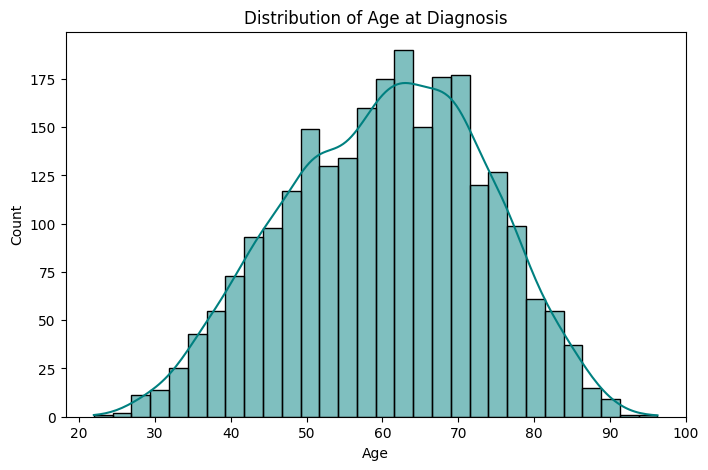

In [ ]:
# 1. Hist Plot : Age Distribution of Patients

plt.figure(figsize=(8,5))
sns.histplot(df["Age at Diagnosis"].dropna(), bins=30, kde=True, color="teal")
plt.title("Distribution of Age at Diagnosis")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


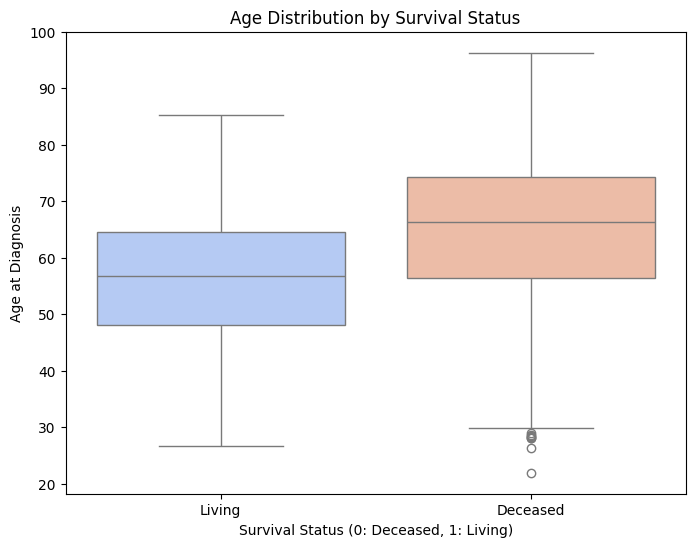

In [ ]:
# 2. Box Plot : Survival Status vs. Age at Diagnosis

plt.figure(figsize=(8,6))
sns.boxplot(x="Overall Survival Status", y="Age at Diagnosis", data=df, palette="coolwarm")
plt.title("Age Distribution by Survival Status")
plt.xlabel("Survival Status (0: Deceased, 1: Living)")
plt.ylabel("Age at Diagnosis")
plt.show()


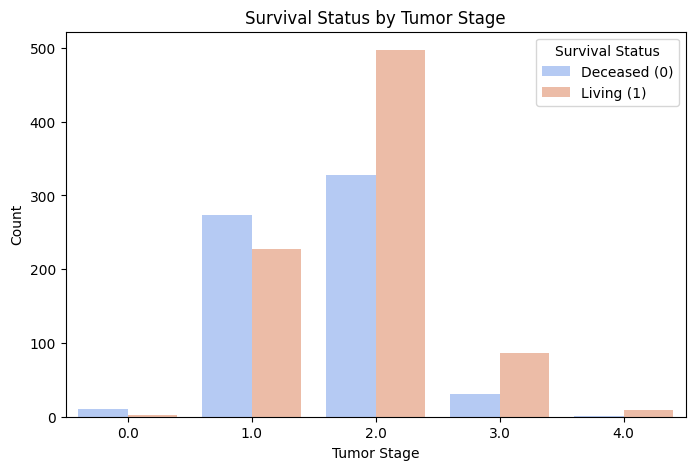

In [80]:
# 3. Survival Status by Tumor Stage

plt.figure(figsize=(8,5))
sns.countplot(x="Tumor Stage", hue="Overall Survival Status", data=df, palette="coolwarm")
plt.title("Survival Status by Tumor Stage")
plt.xlabel("Tumor Stage")
plt.ylabel("Count")
plt.legend(title="Survival Status", labels=["Deceased (0)", "Living (1)"])
plt.show()


<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Explanations of Key Visualizations:</font></h2>

__1. Age Distribution of Patients__

This visualization shows the distribution of patients' ages at the time of breast cancer diagnosis. It helps identify the most common age groups affected by the disease and whether the age distribution follows a specific pattern. The presence of a density curve makes it easier to observe trends, such as whether diagnoses peak at certain ages.

__2. Survival Status vs. Age at Diagnosis__

The boxplot compares the age distribution of patients who survived versus those who didn’t. It highlights differences in median age and the spread of age values within each group. Outliers indicate patients whose ages significantly differ from the majority. This plot helps analyze whether age is a crucial factor in survival.

__3. Survival Status by Tumor Stage__

This visualization illustrates how survival outcomes vary across different tumor stages. By comparing the number of deceased and living patients in each stage, it provides insights into whether higher tumor stages correspond to lower survival rates. It helps in assessing the impact of disease progression on patient outcomes.

<a id="preprocessing"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 4 | Data Preprocessing</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="feature_removal"></a>
# <b><span style='color:coral'>Step 4.1 |</span><span style='color:tomato'> Irrelevant Features Removal</span></b>

In [81]:
# Drop the irrelevant Features

df = df.drop(columns= ["Patient ID", "Sex", "Patient's Vital Status"], axis=1)

<a id="missing"></a>
# <b><span style='color:coral'>Step 4.2 |</span><span style='color:tomato'> Missing Value Treatment</span></b>

In [82]:
# Drop the Rows with Missing Values in the Target Variable

df = df.dropna(subset=["Overall Survival Status"]).reset_index(drop=True)
df

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,...,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,75.65,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,No,claudin-low,1.0,Positve,Positive,...,IDC,140.500000,Living,Negative,Yes,138.65,Not Recurred,ER-/HER2-,22.0,2.0
1,43.19,Breast Conserving,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumA,1.0,Positve,Positive,...,IDC,84.633333,Living,Positive,Yes,83.52,Not Recurred,ER+/HER2- High Prolif,10.0,1.0
2,48.87,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,IDC,163.700000,Deceased,Positive,No,151.28,Recurred,NaN,15.0,2.0
3,47.68,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,Yes,LumB,1.0,Positve,Positive,...,MDLC,164.933333,Living,Positive,Yes,162.76,Not Recurred,NaN,25.0,2.0
4,76.97,Mastectomy,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,Yes,LumB,1.0,Positve,Positive,...,MDLC,41.366667,Deceased,Positive,Yes,18.55,Recurred,ER+/HER2- High Prolif,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,43.10,Breast Conserving,Breast Cancer,Breast Invasive Lobular Carcinoma,High,No,LumA,4.0,Positve,Positive,...,ILC,196.866667,Living,Positive,Yes,194.28,Not Recurred,ER+/HER2- Low Prolif,25.0,NaN
1977,42.88,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumB,4.0,Positve,Positive,...,IDC,44.733333,Deceased,Negative,Yes,16.09,Recurred,NaN,20.0,NaN
1978,62.90,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,High,No,LumB,4.0,Positve,Positive,...,IDC,175.966667,Deceased,Positive,Yes,121.18,Recurred,NaN,25.0,NaN
1979,61.16,Mastectomy,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,No,LumB,4.0,Positve,Positive,...,IDC,86.233333,Deceased,Positive,No,85.10,Not Recurred,ER+/HER2- High Prolif,25.0,NaN


In [83]:
# Fill the Missing Values in the Categorical Features with the Mean and Mode

df["Age at Diagnosis"].fillna(df["Age at Diagnosis"].mean(), inplace=True)
df["Cohort"].fillna(df["Cohort"].mode()[0], inplace=True)

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
<h2 align="left"><font color=red>Inferences:</font></h2>

Some columns in the dataset do not contribute to the analysis or prediction and should be removed:

* __Patient ID__: This is a unique identifier for each patient and does not provide any meaningful information for analysis or modeling. It should be dropped to avoid unnecessary complexity.  
    
* __Sex__: The dataset contains only female patients (as breast cancer is more common in women), this column does not add any useful information. If there is no variation in this feature, it can be removed.

* __Patient's Vital Status__: This column was removed as it provided similar results to the target variable "Overall Survival Status," making it redundant.

Rows with missing values in __"Overall Survival Status"__ were removed to maintain data quality and ensure accurate analysis. This prevents errors in modeling and improves reliability.

Columns with few missing values, such as __"Age at Diagnosis"__ and __"Cohort"__, were filled using appropriate imputation methods like mean and mode

<a id="encoding"></a>
# <b><span style='color:coral'>Step 4.3 |</span><span style='color:tomato'> Categorical Features Encoding</span></b>

In [84]:
# Convert the Categorical Features to Numerical Features using Label Encoding

cat_columns = df.columns[df.dtypes == 'object']

le = LabelEncoder()
for cat in cat_columns:
    df[cat] = le.fit_transform(df[cat])
df

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,...,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage
0,75.65,1,0,2,3,0,6,1.0,1,1,...,2,140.500000,1,0,1,138.65,0,2,22.0,2.0
1,43.19,0,0,2,0,0,2,1.0,1,1,...,2,84.633333,1,1,1,83.52,0,0,10.0,1.0
2,48.87,1,0,2,0,1,3,1.0,1,1,...,2,163.700000,0,1,0,151.28,1,4,15.0,2.0
3,47.68,1,0,5,2,1,3,1.0,1,1,...,6,164.933333,1,1,1,162.76,0,4,25.0,2.0
4,76.97,1,0,5,0,1,3,1.0,1,1,...,6,41.366667,0,1,1,18.55,1,0,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1976,43.10,0,0,3,0,0,2,4.0,1,1,...,3,196.866667,1,1,1,194.28,0,1,25.0,NaN
1977,42.88,1,0,2,0,0,3,4.0,1,1,...,2,44.733333,0,0,1,16.09,1,4,20.0,NaN
1978,62.90,1,0,2,0,0,3,4.0,1,1,...,2,175.966667,0,1,1,121.18,1,4,25.0,NaN
1979,61.16,1,0,2,2,0,3,4.0,1,1,...,2,86.233333,0,1,0,85.10,0,0,25.0,NaN


In [85]:
# Datatypes of the Features after Label Encoding

df.dtypes

Age at Diagnosis                  float64
Type of Breast Surgery              int64
Cancer Type                         int64
Cancer Type Detailed                int64
Cellularity                         int64
Chemotherapy                        int64
Pam50 + Claudin-low subtype         int64
Cohort                            float64
ER status measured by IHC           int64
ER Status                           int64
Neoplasm Histologic Grade         float64
HER2 status measured by SNP6        int64
HER2 Status                         int64
Tumor Other Histologic Subtype      int64
Hormone Therapy                     int64
Inferred Menopausal State           int64
Integrative Cluster                 int64
Primary Tumor Laterality            int64
Lymph nodes examined positive     float64
Mutation Count                    float64
Nottingham prognostic index       float64
Oncotree Code                       int64
Overall Survival (Months)         float64
Overall Survival Status           

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

All categorical features were converted into numerical format using __Label Encoding__. This assigns a unique numerical value to each category, making the data suitable for machine learning models while preserving its structure.

<a id="scaling"></a>
# <b><span style='color:coral'>Step 4.4 |</span><span style='color:tomato'> Feature Scaling</span></b>

In [86]:
# Scale features (critical for KNN distance calculations)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [87]:
# Initialize KNN Imputer (adjust n_neighbors based on data size)

imputer = KNNImputer(n_neighbors=5, weights='distance')  # Use 3-10 neighbors
df_imputed = imputer.fit_transform(df_scaled)

# Convert back to DataFrame and reverse scaling

df_imputed = pd.DataFrame(scaler.inverse_transform(df_imputed), columns=df.columns)
df = df_imputed


<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Feature Scaling__: Numerical features were scaled to ensure uniformity and improve model performance. This helps prevent dominance by features with larger ranges.

* __Missing Value Imputation__: Columns with a large number of missing values were filled using the __KNN Imputer__, which predicts missing values based on the nearest neighbors, preserving data patterns and relationships.

<a id="correlation"></a>
# <b><span style='color:coral'>Step 4.5 |</span><span style='color:tomato'> Feature Correlation</span></b>

In [88]:
# Find the Correlation between the Features

df.corr()

,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,Cohort,ER status measured by IHC,ER Status,...,Oncotree Code,Overall Survival (Months),Overall Survival Status,PR Status,Radio Therapy,Relapse Free Status (Months),Relapse Free Status,3-Gene classifier subtype,Tumor Size,Tumor Stage
Age at Diagnosis,1.000000,0.105140,-0.020145,0.052993,-0.003783,-0.415765,0.001554,0.058856,0.293441,0.278942,...,0.062206,-0.145803,-0.303115,0.085297,-0.127463,-0.084559,-0.064534,-0.165661,0.045978,0.080849
Type of Breast Surgery,0.105140,1.000000,0.029118,0.017245,0.044335,0.064300,-0.017545,0.008885,0.002789,-0.010640,...,-0.004981,-0.112348,-0.174123,-0.036952,-0.485885,-0.109563,0.088921,0.007630,0.241533,0.219802
Cancer Type,-0.020145,0.029118,1.000000,-0.040383,0.028129,-0.019957,0.078201,-0.051188,0.103626,-0.039013,...,0.084689,-0.027626,0.045530,-0.040942,-0.046924,-0.020290,-0.032154,0.038482,-0.013406,-0.074396
Cancer Type Detailed,0.052993,0.017245,-0.040383,1.000000,0.084827,-0.115688,0.063988,-0.039345,0.161129,0.094956,...,0.699128,0.036518,-0.014288,0.084579,-0.053921,0.030933,-0.018373,-0.069153,0.008142,-0.101022
Cellularity,-0.003783,0.044335,0.028129,0.084827,1.000000,-0.063705,0.148688,-0.102776,0.092460,0.044178,...,0.075948,0.037511,0.008493,0.028045,-0.036856,0.017248,0.004789,0.038176,-0.073892,-0.068778
Chemotherapy,-0.415765,0.064300,-0.019957,-0.115688,-0.063705,1.000000,-0.075536,-0.133042,-0.513951,-0.449519,...,-0.112020,-0.162947,0.035280,-0.256699,0.234951,-0.143892,0.135218,0.226495,0.198218,0.334580
Pam50 + Claudin-low subtype,0.001554,-0.017545,0.078201,0.063988,0.148688,-0.075536,1.000000,-0.145956,0.163463,0.102372,...,0.044668,0.026282,0.070589,0.028320,0.004469,0.035655,-0.045770,-0.068081,-0.046597,-0.052015
Cohort,0.058856,0.008885,-0.051188,-0.039345,-0.102776,-0.133042,-0.145956,1.000000,-0.075162,-0.004237,...,-0.011877,0.090927,-0.154633,0.018509,-0.203728,0.074819,0.010319,-0.016501,0.015202,-0.014845
ER status measured by IHC,0.293441,0.002789,0.103626,0.161129,0.092460,-0.513951,0.163463,-0.075162,1.000000,0.714323,...,0.122943,0.095315,-0.001551,0.398906,-0.125338,0.062689,-0.061594,-0.351662,-0.097906,-0.165972
ER Status,0.278942,-0.010640,-0.039013,0.094956,0.044178,-0.449519,0.102372,-0.004237,0.714323,1.000000,...,0.161909,0.124821,-0.028093,0.542302,-0.083772,0.083115,-0.036986,-0.471022,-0.075291,-0.089640


<Axes: title={'center': 'Correlation of Attributes'}>

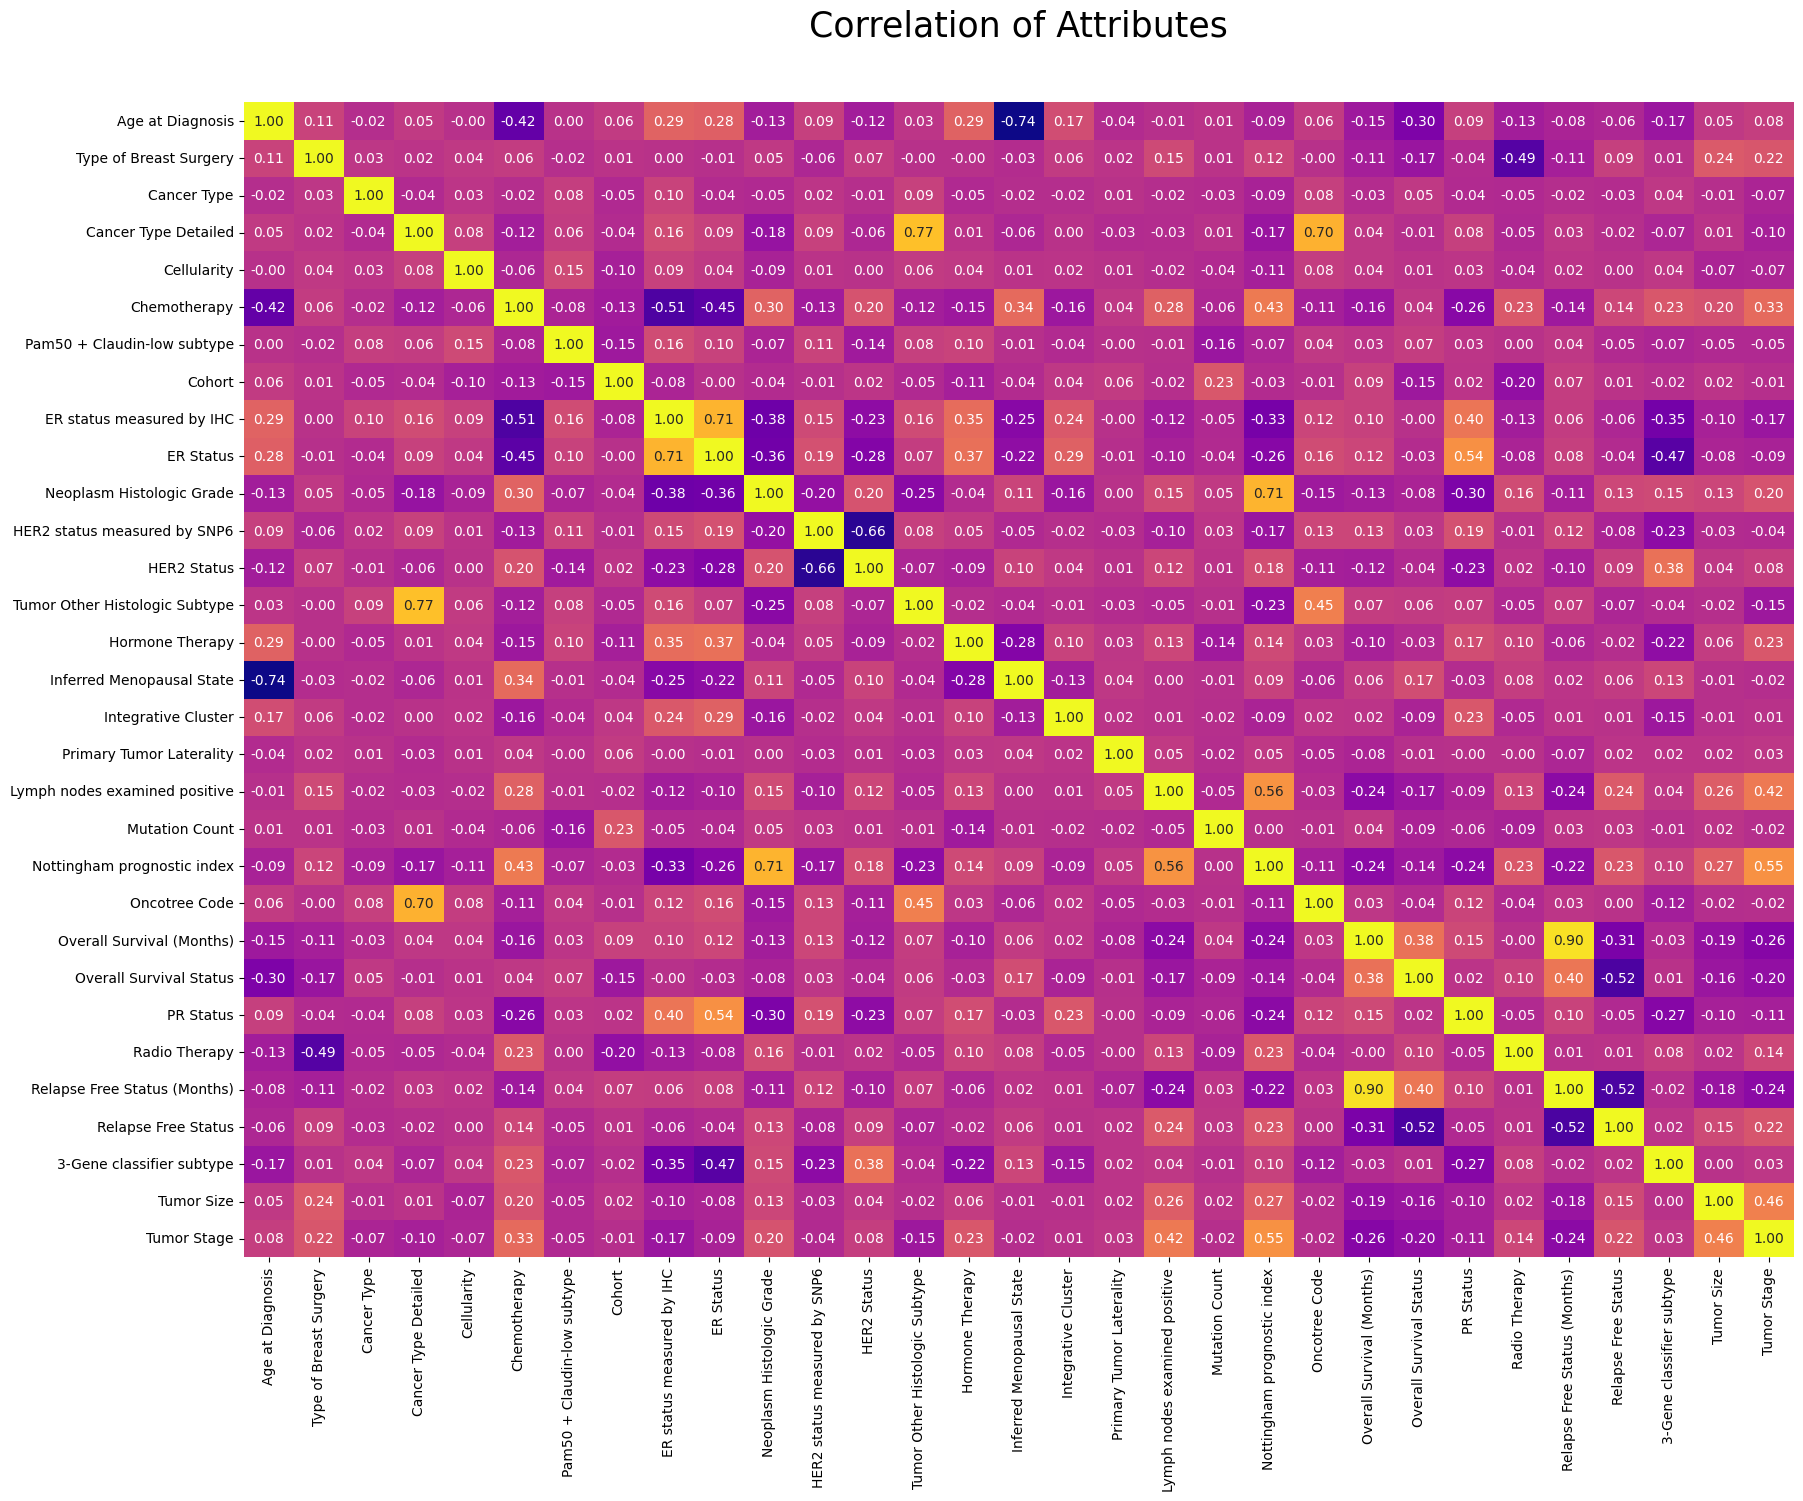

In [89]:
# Correlation of the Attributes

plt.figure(figsize = (20,15))
plt.title('Correlation of Attributes', y=1.05, size=25)
sns.heatmap(df.corr(), cmap='plasma',annot=True, fmt='.2f', cbar=False)

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

* __Strong Positive Correlation__: Some numerical features may exhibit a high positive correlation __(close to +1)__, meaning that as one variable increases, the other tends to increase as well. For example, __Overall Survival (Months)__ and the __Relapse Free Status (Months)__ are positively correlated.
    
    
* __Strong Negative Correlation__: A correlation __close to -1__ indicates a strong inverse relationship, where an increase in one feature results in a decrease in another. For instance, __Age at Diagnosis__ correlate negatively with __Inferred Menopausal State__.
    
    
* __Weak or No Correlation__: If the correlation coefficient is __close to 0__, it suggests little to no linear relationship between the features. For example, __HER2 Status__ and __Cellularity__ are independent of each other.
    

* __Medical Implications__: Understanding these correlations is crucial in identifying key factors that influence breast cancer prognosis and treatment outcomes. Features with strong correlations can be useful in predictive modeling.

<a id="splitting"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 5 | Data Splitting</p>

⬆️ [Table of Contents](#contents_tabel)

In [90]:
# Split the Dataset into Features and Target Variable

x = df.drop("Overall Survival Status", axis=1)
y = df["Overall Survival Status"]


In [91]:
# Split the Dataset into Training and Testing Sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1584, 30), (397, 30), (1584,), (397,))

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Inferences:</font></h2>

The dataset was split into __features (x)__ and __target variable (y)__, where __"Overall Survival Status"__ was set as the target.

Using __train-test split__, the data was divided into __80% training__ and __20% testing__ to ensure effective model training and evaluation.

<a id="lr"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 6 | Logistic Regression Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:120%; text-align:left">

__🔍<span style="font-size:130%; color:red"> Note: </span>__ In medical diagnostics, particularly for identifying illnesses, __high recall (sensitivity) for the positive class (patients with the condition) is crucial__. A high recall ensures that nearly all actual positive cases are correctly detected, even if it leads to some false positives (misclassifying healthy individuals as having the condition). This trade-off is acceptable because it's far better to have false alarms than to overlook a patient who genuinely needs medical attention.

<a id="lr_base"></a>
# <b><span style='color:coral'>Step 6.1 |</span><span style='color:tomato'> LR Base Model Definition</span></b>

In [92]:
# Initialize the Logistic Regression Model

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

<a id="lr_hp"></a>
# <b><span style='color:coral'>Step 6.2 |</span><span style='color:tomato'> LR Hyperparameter Tuning</span></b>

In [93]:
# Define the hyperparameter grid

grid_parameter = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [100, 200, 500],  # Iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2]  # Tolerance for stopping criteria
}

# Perform Grid Search

grid_search = GridSearchCV(model, grid_parameter, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga'],
                         'tol': [0.0001, 0.001, 0.01]},
             verbose=1)

In [94]:
# Find the best parameters

best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001}
Best Score: 0.8219602284071398


In [95]:
# Fit the model with the best parameters

lr_model = LogisticRegression(**best_parameter)
lr_model.fit(x_train, y_train)

LogisticRegression(C=1, max_iter=500, penalty='l1', solver='liblinear')

<a id="lr_eval"></a>
# <b><span style='color:coral'>Step 6.3 |</span><span style='color:tomato'> LR Model Evaluation</span></b>

In [96]:
# Classification Report of the Logistic Regression Model

y_pred = lr_model.predict(x_test)

classification = classification_report(y_test, y_pred)
print("Classification Report :\n")
print(classification)

Classification Report :

              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85       233
         1.0       0.79      0.77      0.78       164

    accuracy                           0.82       397
   macro avg       0.82      0.81      0.81       397
weighted avg       0.82      0.82      0.82       397



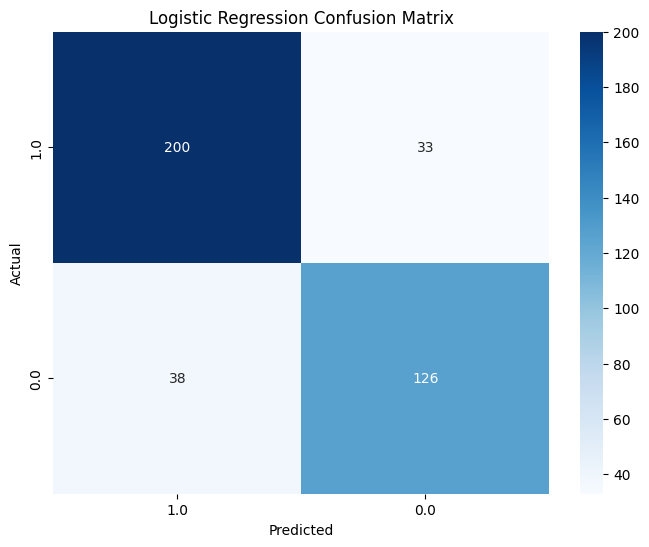

In [97]:
# Plot the confusion matrix as a heatmap

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="border-radius: 10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Logistic Regression Model:</font></h2>

The __Logistic Regression model__ was trained with __hyperparameter tuning__, which helped optimize its performance, particularly in achieving a __high recall__, making it effective for identifying positive cases. 

The model’s performance was evaluated using a __classification report__, which provided key metrics such as __precision, recall, and F1-score__. A __confusion matrix__ was also used to analyze the distribution of correct and incorrect predictions, providing a clearer understanding of the model’s effectiveness.

<a id="lr_vis"></a>
# <b><span style='color:coral'>Step 6.4 |</span><span style='color:tomato'> AUC-ROC Curve Visualization</span></b>

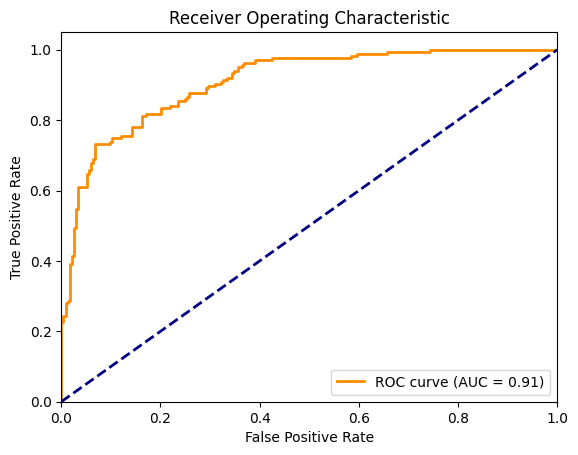

In [98]:
# ROC Curve and AUC

y_pred_prob = lr_model.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>AUC-ROC Curve Visualization:</font></h2>

The model’s performance was visualized using the __AUC-ROC curve__, which helps assess its ability to differentiate between classes. With an __ROC curve (AUC = 0.91)__, the curve demonstrates the model's strong ability to distinguish between the classes, though not perfectly. This visualization provides deeper insights into the model’s effectiveness in medical diagnosis

<a id="dt"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 7 | Decision Tree Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="dt_base"></a>
# <b><span style='color:coral'>Step 7.1 |</span><span style='color:tomato'> DT Base Model Definition</span></b>

In [99]:
# Initialize the Decision Tree model

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

<a id="dt_hp"></a>
# <b><span style='color:coral'>Step 7.2 |</span><span style='color:tomato'> DT Hyperparameter Tuning</span></b>

In [100]:
# Define the hyperparameter grid

grid_parameter = {
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples per leaf
}

# Perform Grid Search

grid_search = GridSearchCV(model, grid_parameter, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             verbose=1)

In [101]:
# Find the best parameters

best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 0.7821926286786727


In [102]:
# Fit the model with the best parameters

dt_model = DecisionTreeClassifier(**best_parameter)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10)

<a id="dt_eval"></a>
# <b><span style='color:coral'>Step 7.3 |</span><span style='color:tomato'> DT Model Evaluation</span></b>

In [103]:
# Classification Report of the Decision Tree Model

y_pred = dt_model.predict(x_test)

classification = classification_report(y_test, y_pred)
print("Classification Report :\n")
print(classification)

Classification Report :

              precision    recall  f1-score   support

         0.0       0.83      0.86      0.85       233
         1.0       0.79      0.76      0.77       164

    accuracy                           0.82       397
   macro avg       0.81      0.81      0.81       397
weighted avg       0.82      0.82      0.82       397



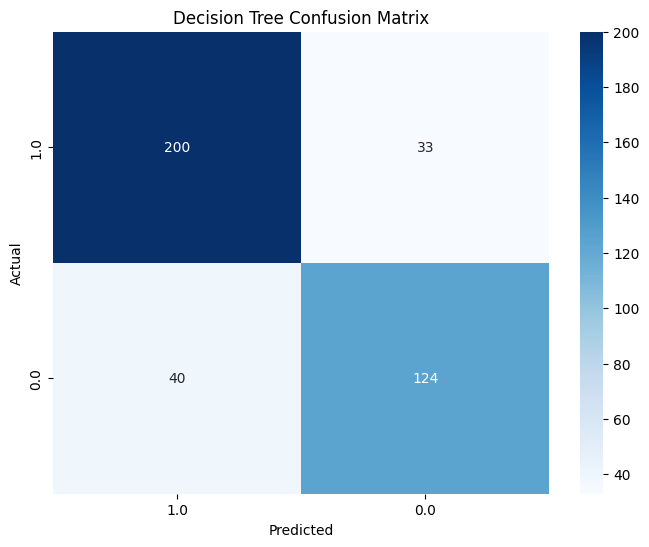

In [104]:
# Plot the confusion matrix as a heatmap

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Decision Tree Model:</font></h2>

In addition to Logistic Regression, a __Decision Tree__ model was built to analyze the dataset. This model was trained to capture complex relationships between features and improve interpretability. Like the previous model, it was evaluated using a __classification report__ and a __confusion matrix__ to assess its performance.

<a id="dt_vis"></a>
# <b><span style='color:coral'>Step 7.4 |</span><span style='color:tomato'> DT Model Visualization</span></b>

In [105]:
# Save the Decision Tree Model as a PNG Image

!pip install pydotplus

import pydotplus
from IPython.display import Image
from sklearn.tree import export_graphviz

y = y.map({0: "Deceased", 1: "Living"})

# Visualizing the Decision Tree

dot_data = export_graphviz(
    dt_model,
    out_file=None,
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("breast_cancer_tree.png")



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


True

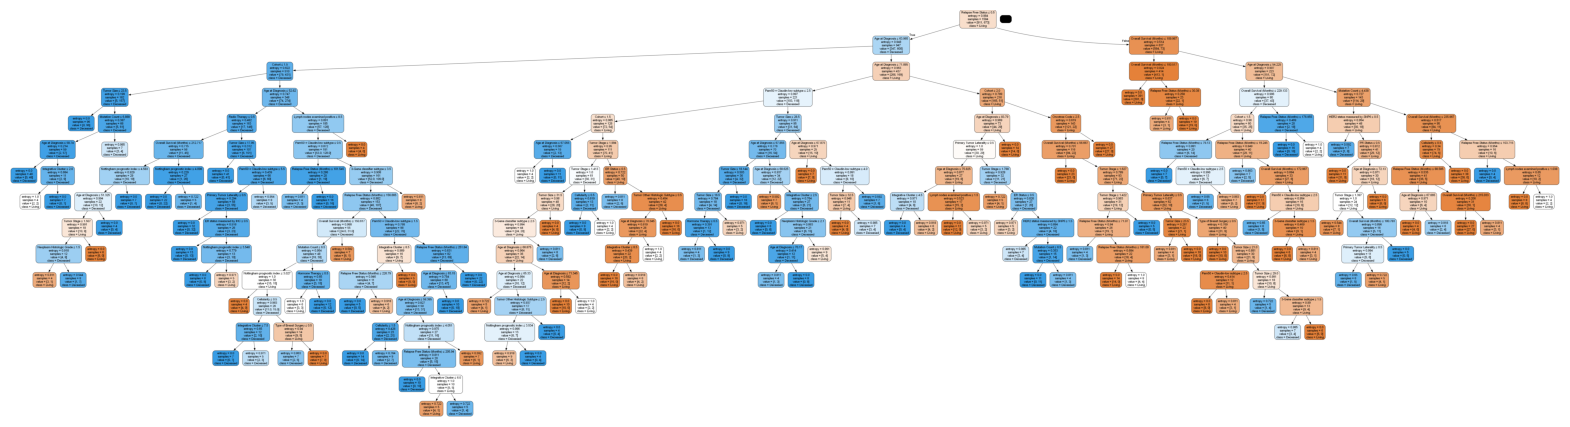

In [106]:
# Show the decision tree visualization (can be found in the current directory)

plt.figure(figsize=(20, 20))
plt.imshow(plt.imread("breast_cancer_tree.png"))
plt.axis('off')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Decision Tree Visualization:</font></h2>

The __Decision Tree__ was visualized to understand its decision-making process. Using __Entropy__ as the splitting criterion, the tree effectively classified patients by identifying the most important features at each split. This visualization helps interpret the model’s structure and the key factors influencing predictions.

<a id="rf"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 8 | Random Forest Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="rf_base"></a>
# <b><span style='color:coral'>Step 8.1 |</span><span style='color:tomato'> RF Base Model Definition</span></b>

In [107]:
# Train the Random Forest Model with 100 Trees

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

<a id="rf_hp"></a>
# <b><span style='color:coral'>Step 8.2 |</span><span style='color:tomato'> RF Hyperparameter Tuning</span></b>

In [108]:
# Define the hyperparameter grid

grid_parameter = {
    'n_estimators': [50, 100, 200, 300],  # Number of trees in the forest
    'criterion': ['gini', 'entropy'],  # Splitting criteria
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples per leaf
    'bootstrap': [True, False]  # Whether to use bootstrap sampling
}

# Perform Grid Search

grid_search = GridSearchCV(model, grid_parameter, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 864 candidates, totalling 4320 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]},
             verbose=1)

In [109]:
# Find the best parameters

best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8295471788523738


In [110]:
# Fit the model with the best parameters

rf_model = RandomForestClassifier(**best_parameter)
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       min_samples_leaf=2, n_estimators=50)

<a id="rf_eval"></a>
# <b><span style='color:coral'>Step 8.3 |</span><span style='color:tomato'> RF Model Evaluation</span></b>

In [111]:
# Classification Report of the Random Forest Model

y_pred = rf_model.predict(x_test)

classification = classification_report(y_test, y_pred)
print("Classification Report :\n")
print(classification)

Classification Report :

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       233
         1.0       0.79      0.78      0.79       164

    accuracy                           0.82       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.82      0.82      0.82       397



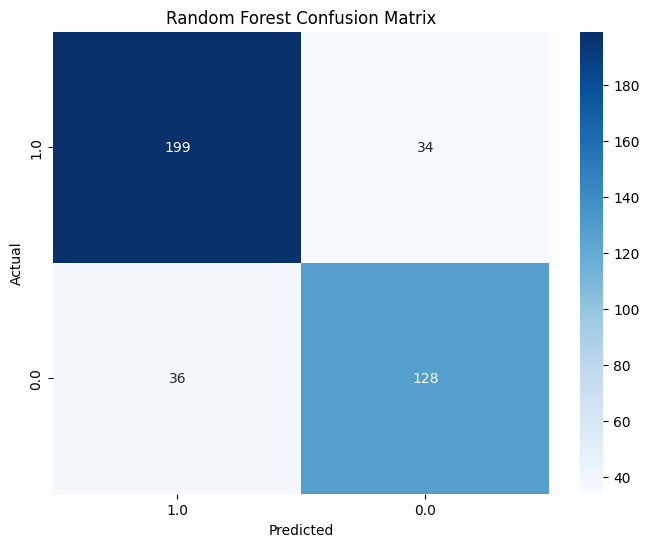

In [112]:
# Plot the confusion matrix as a heatmap

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Random Forest Model:</font></h2>

The __Random Forest model achieved strong classification performance__, making it reliable for predicting survival outcomes. Its ability to handle complex relationships and __reduce overfitting__ contributes to its robustness. However, to ensure the model's generalizability, further validation using external datasets is recommended.

<a id="svm"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 9 | Support Vector Machine (SVM) Model Building</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="svm_base"></a>
# <b><span style='color:coral'>Step 9.1 |</span><span style='color:tomato'> SVM Base Model Definition</span></b>

In [113]:
# Train the Support Vector Machine Model

model = SVC()
model.fit(x_train, y_train)

SVC()

<a id="svm_hp"></a>
# <b><span style='color:coral'>Step 9.2 |</span><span style='color:tomato'> SVM Hyperparameter Tuning</span></b>

In [114]:
# Define the hyperparameter grid

grid_parameter = {
    'C': [0.1, 1, 10],  # Reduced range of regularization parameter
    'kernel': ['linear', 'rbf'],  # Keep only the most efficient kernels
    'gamma': ['scale', 0.01, 0.1],  # Reduce gamma choices
}

# Perform Grid Search

grid_search = GridSearchCV(model, grid_parameter, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.1],
                         'kernel': ['linear', 'rbf']})

In [115]:
# Find the best parameters

best_parameter = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_parameter)
print("Best Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 0.8194405622329592


In [116]:
# Fit the model with the best parameters

svm_model = SVC(**best_parameter)
svm_model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

<a id="svm_eval"></a>
# <b><span style='color:coral'>Step 9.3 |</span><span style='color:tomato'> SVM Model Evaluation</span></b>

In [117]:
# Classification Report of the Support Vector Machine Model

y_pred = svm_model.predict(x_test)

classification = classification_report(y_test, y_pred)
print("Classification Report :")
print(classification)

Classification Report :
              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       233
         1.0       0.79      0.79      0.79       164

    accuracy                           0.83       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.83      0.83      0.83       397



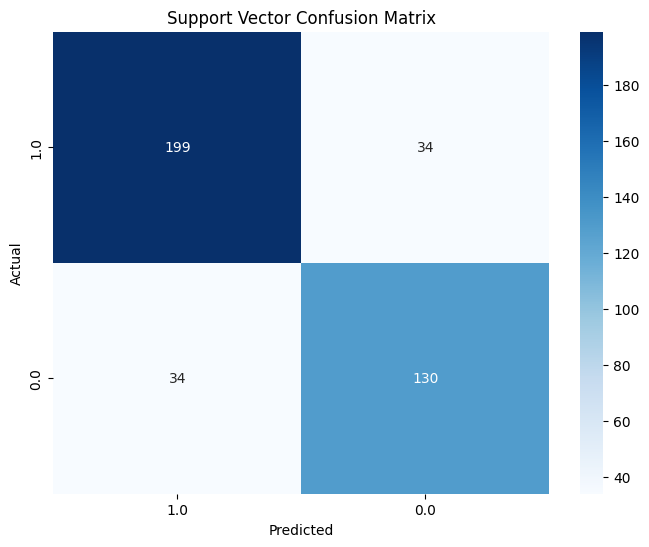

In [118]:
# Plot the confusion matrix as a heatmap

confusion = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=df["Overall Survival Status"].unique(),
            yticklabels=df["Overall Survival Status"].unique())
plt.title('Support Vector Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<div style="border-radius:10px; padding: 15px; background-color: rgb(250, 240, 200); font-size:115%; text-align:left">

<h2 align="left"><font color=red>Support Vector Machine (SVM) Model:</font></h2>

A __Support Vector Machine (SVM)__ model was built to classify the data effectively. SVM helps find the optimal decision boundary to separate classes, making it a powerful algorithm for classification tasks. The model was evaluated using a __classification report__ and a __confusion matrix__ to assess its precision, recall, and overall performance.

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
    
<h2 align="left"><font color=red>✅ Inference:</font></h2>

In this project on __Breast Cancer Survival Prediction__, the __SVM model__ emerged as the most effective for predicting patient survival. The focus on __recall for Living patients (class 1)__ was crucial, as the primary objective in a medical context is to ensure that all __surviving patients__ are accurately identified to provide them with the necessary care and treatment.

While __false positives__ (deceased patients misclassified as living) are important to minimize, __false negatives__ (living patients misclassified as deceased) in cancer survival prediction can have severe consequences, such as __denying life-saving treatments__. Thus, high recall for class 1 ensures that __no living patients are overlooked__ and receive the appropriate medical intervention.

The __SVM model__ was chosen due to its ability to establish an __optimal decision boundary__, which is crucial for distinguishing between __living__ and __deceased__ patients with minimal misclassification. Its performance in terms of recall for __Living patients__ at __0.79__ and __Deceased patients__ at __0.85__ shows that it effectively balances identifying patients in both classes, making it the most reliable model for this application.

For a __Breast Cancer Survival Prediction__ project, where patient lives are at stake, __SVM__ is the ideal model due to its __strong recall performance for class 1 (Living)__. By ensuring accurate predictions for __surviving patients__, we enhance the likelihood that all those in need of care will receive the necessary treatment, thereby improving overall patient outcomes and safety.

<a id="interpretation"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 10 | Model Interpretation and Visualization</p>

⬆️ [Table of Contents](#contents_tabel)

<a id="kmf"></a>
# <b><span style='color:coral'>Step 10.1 |</span><span style='color:tomato'> Kaplan-Meier survival curves</span></b>

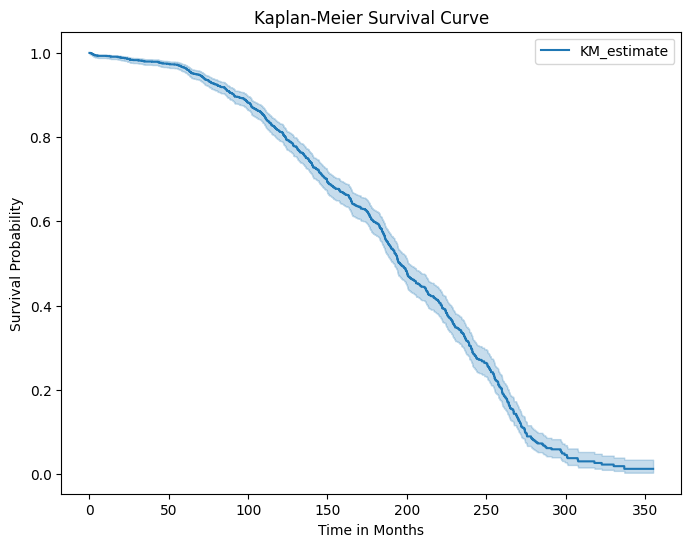

In [119]:
# Kaplan-Meier Survival Curve

kmf = KaplanMeierFitter()
kmf.fit(durations=df["Overall Survival (Months)"], event_observed=df["Overall Survival Status"])

plt.figure(figsize=(8, 6))
kmf.plot_survival_function()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time in Months")
plt.ylabel("Survival Probability")
plt.show()

<div style="border-radius:10px; padding: 10px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
    
<h2 align="left"><font color=red> Kaplan-Meier Survival Curve - Inference:</font></h2>

The __Kaplan-Meier Survival Curve__ was plotted to analyze patient survival probabilities over time. The curve provides key insights into how survival rates change, helping understand the progression of breast cancer in the dataset.

* The curve shows a gradual decline, indicating that survival probability decreases over time.
* Steeper drops suggest periods where more patients experience adverse outcomes, while flatter regions indicate stable survival rates.
* If survival curves were compared for different groups (e.g., tumor stages, treatment types), differences in survival patterns could highlight factors influencing patient outcomes.

This analysis is valuable for medical decision-making, as it helps estimate survival probabilities and assess the effectiveness of treatments.

<a id="cphm"></a>
# <b><span style='color:coral'>Step 10.2 |</span><span style='color:tomato'> Cox Proportional Hazards Models</span></b>

<lifelines.CoxPHFitter: fitted with 1981 total observations, 1144 right-censored observations>
             duration col = 'Overall Survival (Months)'
                event col = 'Overall Survival Status'
      baseline estimation = breslow
   number of observations = 1981
number of events observed = 837
   partial log-likelihood = -4008.07
         time fit was run = 2025-02-18 08:43:47 UTC

---
                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                        
Age at Diagnosis                -0.03      0.97      0.00           -0.04           -0.02                0.96                0.98
Type of Breast Surgery          -0.24      0.79      0.08           -0.40           -0.08                0.67                0.93
Cancer Type                      0.35      1.42      0.73           -1.08            1.78                0.34                5.94
Cancer Type Detailed            -0.05      0.95      0.06           -0.16            0.06                0.85                1.07
Cellularity                     -0.01      0.99      0.04           -0.09            0.06                0.92                1.06
Chemotherapy                     0.09      1.10      0.12           -0.15            0.33                0.86                1.40
Pam50 + Claudin-low subtype      0.03      1.03      0.02           -0.01            0.07                0.99                1.07
Cohort                          -0.18      0.84      0.04           -0.25           -0.11                0.78                0.90
ER status measured by IHC       -0.03      0.97      0.13           -0.28            0.22                0.75                1.25
ER Status                       -0.16      0.86      0.15           -0.44            0.13                0.64                1.14
Neoplasm Histologic Grade       -0.18      0.84      0.10           -0.38            0.02                0.69                1.02
HER2 status measured by SNP6    -0.09      0.92      0.06           -0.19            0.02                0.82                1.02
HER2 Status                      0.06      1.06      0.15           -0.24            0.36                0.78                1.44
Tumor Other Histologic Subtype   0.05      1.05      0.03           -0.01            0.10                0.99                1.10
Hormone Therapy                  0.18      1.20      0.09            0.00            0.35                1.00                1.42
Inferred Menopausal State       -0.24      0.78      0.12           -0.48           -0.01                0.62                0.99
Integrative Cluster             -0.00      1.00      0.01           -0.03            0.02                0.97                1.02
Primary Tumor Laterality         0.02      1.02      0.06           -0.11            0.14                0.90                1.15
Lymph nodes examined positive   -0.01      0.99      0.02           -0.04            0.02                0.96                1.03
Mutation Count                   0.01      1.01      0.01           -0.01            0.03                0.99                1.03
Nottingham prognostic index      0.16      1.17      0.08            0.01            0.31                1.01                1.36
Oncotree Code                   -0.01      0.99      0.04           -0.09            0.06                0.92                1.07
PR Status                        0.13      1.14      0.09           -0.04            0.31                0.96                1.37
Radio Therapy                    0.07      1.08      0.09           -0.11            0.26                0.90                1.30
Relapse Free Status (Months)    -0.07      0.93      0.00           -0.07           -0.06                0.93                0.94
Relapse Free Status            -12.77      0.00      0.52          -13.80          -11.75 

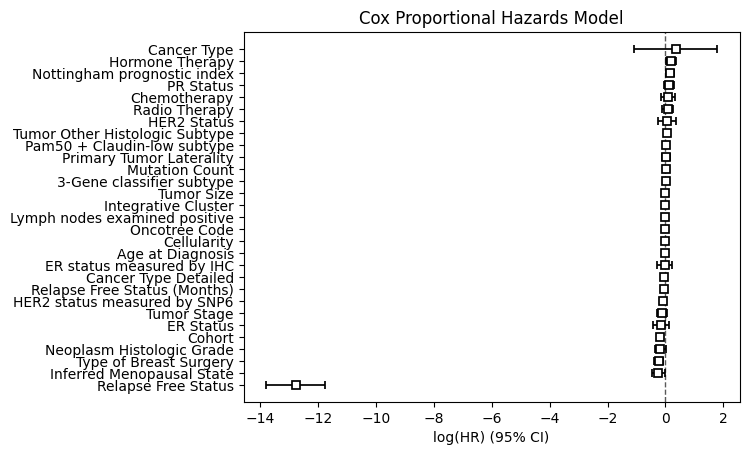

In [120]:
# Cox Proportional Hazards Model

cph = CoxPHFitter()
cph.fit(df, duration_col='Overall Survival (Months)', event_col='Overall Survival Status')

cph.print_summary()

cph.plot()
plt.title("Cox Proportional Hazards Model")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
    
<h2 align="left"><font color=red> Kaplan-Meier Survival Curve - Inference:</font></h2>

The __Cox Proportional Hazards Model__ was used to analyze the impact of different variables on patient survival time. This model estimates the hazard (risk of an event occurring) while considering multiple factors without requiring a specific survival distribution.

* Significant variables in the model indicate which factors strongly influence survival time. For example, tumor stage, age at diagnosis, and specific genetic markers may contribute to higher or lower risk.
* __Hazard ratios (HR)__ provide insight into risk levels—values __greater than 1__ indicate __increased risk__, while values __less than 1__ suggest a __protective effect__.
* The model helps in identifying high-risk patient groups, aiding in personalized treatment strategies.

By combining insights from the __Kaplan-Meier Survival Curve__ and the __Cox Model__, we can better understand patient survival patterns and the key factors affecting longevity.

<a id="conclusion"></a>
# <p style="background-color:chocolate; font-family:calibri; color:white; font-size:150%; text-align:center; border-radius:50px 50px;">Step 11 | Conclusion</p>

⬆️ [Table of Contents](#contents_tabel)

<div style="border-radius:10px; padding: 15px; background-color:rgb(250, 240, 200); font-size:115%; text-align:left">
    
<h2 align="left"><font color=red> Overall Conclusion:</font></h2>

This project aimed to __analyze breast cancer patient survival__ using a combination of __machine learning models__ and __statistical methods__, providing a comprehensive approach to predict patient outcomes. The process involved key steps such as __data preprocessing, feature selection, handling missing values,__ and __model training__ to predict survival probabilities and identify influential factors affecting patient survival.

* __Logistic Regression__ achieved a __good recall__ for class 1 (living patients), proving its effectiveness in identifying survivors.
* __Decision Tree__ and __Random Forest__ provided interpretable results, with __Random Forest__ reducing overfitting by leveraging __ensemble learning__ techniques, which enhanced model robustness.
* __Support Vector Machine (SVM)__ was highly effective in __finding optimal decision boundaries__ for classifying patients as either living or deceased, ensuring precise classification

* __Kaplan-Meier Survival Curve__ was used to visualize survival probabilities over time, offering valuable insights into __survival trends.__
* __Cox Proportional Hazards Model__ helped identify significant factors that affect __patient survival__, contributing to better __risk assessment__ and supporting __personalized treatment planning.__

The importance of __high recall for class 1__ was highlighted, ensuring that __living patients__ are correctly identified, minimizing __false negatives__ in the medical diagnosis process. This is especially important in breast cancer survival prediction, where missing a survivor could result in missed opportunities for life-saving treatments.

In conclusion, the models developed in this project can significantly aid in __early detection, risk assessment,__ and __treatment strategy decision-making__ for breast cancer patients. By combining __predictive modeling__ with __survival analysis__, this analysis offers a __data-driven approach__ to understanding breast cancer prognosis, ultimately contributing to improved __patient care__ and __medical research__.